<img src='images/logo-CESI.png' width="400" height="400">

# <font color='#8B0000'> ADEME PROJECT </font> 

### Group 3 :
Ray-Hann Massoudi ; Dylan Tain ; Charlie Do ; Valentin Malhas

## Context

According to ADEME, the main goal of our work project is to reduce the rate of air pollution and the expenses of our freight carrier.
Which means that we have to find out a new way to optimise our truck movement. 
Our plan is to develop an algorithm, that will be able to predict one the best time length for each route.
However, our algorithm will be given some constraints all along the process in order to improve its accuracy.

Some examples are :
- The length of time of a route will be able to change in accordance with the period to simulate traffic jams.
- Some object can only be retrieved at a specific city

Our initial problem can be problematise as follow : " Which is the shortest closed walk passing through each cities from a sub-set L at least once".<br>
The data that are needed for this problem are : 
- A graph representation : G=(V',E')
- A list of city to deliver : L | L $\subseteq$ V

# Choosing our modeling

Our group decided to choose an adjacency matrix over adjacency list. In our situation, we thought that using an adjacency list would be causing more issues than adjacency matrix because it won't be able to handle dense graph and weight on each vertex.
Furthermore, adjacency matrix are easier and faster to build even if the computation of the powers of the adjacency matrix has a non negligible memory cost.

# Generating an adjacency matrix

The adjacency matrix will correspond to our starting situation (the number of cities, the different roads and their travel time).

Our matrix must respect several rules so that our situation is the closest to reality:

1) The generation of our matrix must be random because we must be able to face all the kind of situations that we can meet.

2) We consider that our graph is undirected for this our matrix must be symmetrical.

3) The diagonal of our matrix must be null because we cannot make a path on the same vertex.

# Complexity Proof

We theorized that the problem would be np-hard

## Proof in NP-HARD (Polynomial Reduction) :
First we're gonna prove that our problem is NP-Hard.

To do that we first need to find a problem alike to our to reduce it to the ADEME.

To do that we take the traveler salemen problem, which can be problematise as follow: <br>
Question : "Which is the shortest cycle passing through each city once and only once"<br>
Data : 
- A graph representation : G=(V,E) |V $\subseteq$ V'

We can pass from one probleme following the alghoritm as follow :
- For each edge in the ADEME The same path can be found in the Traveler salemen problem
- For each edge that doesn't exist in the ADEME we create an edge with a weight equal to the shortest weight walk from the two vertices in the ADEME
- If a path between two vertice exist using only vertice that exist only in the Ademe problem then if the path is shorter add the vertices to the Traveler salemen Problem


Below there is a shematic explanation :
Taking into account the following list of deliveries : (0,1,2,3)
<img src='reduc_poly.png' width="450" height="600">
In this exemple ,  2 edges and 1 vertice and don't exist : 

- If U7$\cup$U8 < U3 then U7,U8 and the vertice 4 can be seen in the traveler salemen problem 
- U4 : it can be replaced by the path U1 --> U6 or U1-->U2-->(U3 or U7 --> U8):
$$ U4 = min(U1\cup U6, U1\cup U2\cup min(U3,U7 \cup U8))$$
- U6 : it can be replaced by the path U1 --> U5 --> U3 or U1-->U2 .
$$ U6 = min(U1\cup U2, U1\cup U2\cup min(U3,U7 \cup U8))$$

So the steps of the transformation are as follow:<br>
```
for each possible edge between the vertice of the delivery list :(O(E))
    check for shortest path from same Start and End in ADEMEO (O(E + V log V))
    Add it to traveller salemen graph (O(1))
Calcultate Traveler salement solution (Not polynomial)
For each edge from solution : (O(N))
    if dont exist in ADEME:
        Change it to it's translation (shortest annexe path)(O(1))
        
```

That means that traveler's problem can be reduced as ADEME'S problem. We can conclude that ADEME's problem is at least as much difficult than traveler's problem  , traveler's problem is NP-Hard so ADAME's problem is NP-Hard too.
 

## Proof not in NP

The verification of the ADEME probleme can be put as : "Is there any route shorter than k that pass through every vertice from the list L at least once".

Data : 
- A graph representation : G=(V,E')
- A list of city to deliver : L | L  ⊆  V
- Weight from the solution found k

We are searching to which complexity class our verification problem belong to.

The verification of this problem can be put as follow : "Is this route shorter than <b> k </b> and contain all node from a sub-set L at least once"

With S the solution we can set an algorithm as follow : 
- Check if the route contain every node (O(S))
- Check if the length of the cycle is below <b> k </b> (O(S))

So the verification of the ADEME probleme is in NP
Now we need to know if it's also in NP-HARD.

To do that we use the polynomial reduction :
So we first need to find a problem alike to our to reduce it to the ADEME.

We choose to take the traveler salemen problem, which can be problematise as follow: <br>
Question : "Which is the shortest cycle passing through each city once and only once"<br>
Data : 
- A graph representation : G=(V,E) |V $\subseteq$ V'

We can pass from one probleme following the alghoritm as follow :
- For each edge in the ADEME The same path can be found in the Traveler salemen problem
- For each edge that doesn't exist in the ADEME we create an edge with a weight equal to the shortest weight walk from the two vertices in the ADEME
- If a path between two vertices exist which use only vertices that exist only in the Ademe problem, if the path is shorter add the vertices to the Traveler salemen Problem.


Below there is a shematic explanation : <br>
Taking into account the following list of deliveries : (0,1,2,3) <br>
<img src='reduc_poly.png' width="450" height="600">
In this exemple ,  2 edges and 1 vertice don't exist : 

- If U7 $\cup$ U8 < U3 then U7,U8 and the vertice 4 can be seen in the traveler salemen problem 
- U4 : it can be replaced by the path U1 --> U6 or U1-->U2-->(U3 or U7 --> U8):
$$ U4 = min(U1\cup U6, U1\cup U2\cup min(U3,U7 \cup U8))$$
- U6 : it can be replaced by the path U1 --> U5 --> U3 or U1-->U2 .
$$ U6 = min(U1\cup U2, U1\cup U2\cup min(U3,U7 \cup U8))$$

The transformation steps are as follow:<br>
```
for each possible edges between the vertice of the delivery list :(O(E))
    if exists in ADEME:
        add Edge and vertice to the traveller salemen graph (O(1))
        if Start and End in List  delivery :
            check for shortest path from same Start and End in ADEMEO (O(E + V log V))
            if shortest path only made of non existent vertice add it to traveller salemen graph (O(1))
    else:
        Add in traveller salemen problem graph with a weight equal to the shortest path from ADEME
        Add a translation from one to another 
Calcultate Traveler salement verification solution (Not polynomial)
        
```

That means that traveler's problem can be reduced as ADEME'S problem. We can conclude that ADEME's Verification problem is at least as much difficult than the traveler salement verification problem  , traveler salement verification problem is NP-Complete so the ADAME's Verification problem is NP-Hard.

So as the ADAME's Verification problem is in NP-Hard and NP it's in NP-Complete so it's thought to not be in P

So we can say that the ADAME problem doesn't have a verification doable in polynomial time so it's not in NP

## Complexity Conclusion

As our problem can be found in NP-HARD but not in NP the ADEME Probleme is NP-HARD

# Operational Search

The variables of our situation are as follow :<br>
    
$X_{i,j}$ : Path Chosen Array<br>
$U_{i}$ : Order List<br>
    
The objective function is:
    $$Min: \sum_{n=1,m=1}^{i,j} M_{n,m} X_{n,m} $$ 
The constraints are : 
    $$C.S:\left\{
    \begin{array}{ll}
        \text{ We enter each vertice once and only once } \\
        \text{ We exit each vertice once and only once } \\
        \text{ No sub-loop }\\
        \text{ No going to self loop }\\
        \text{ The state matrice is binary (only made of 0 and 1) } \\
        \text{ The Order List is made of Integer between 1 and i }\\ 
    \end{array}
\right.$$
That can be written as :
    $$C.S:\left\{
    \begin{array}{ll}
        \sum_{m=1}^j X_{n,m} = 1  \forall \space n \in [1,i]\\
        \sum_{m=1}^j X_{m,n} = 1  \forall \space n \in [1,i]\\
        U_n - U_m <= i * (1 - X_{n,m}) - 1 \forall \space n,m \space \in [1,i]\\
        \sum_{m=1}^i X_{m,m} = 0 \\
        X_{c,p} \in \{0,1\} \text{ } \forall \text{ } c \in [1,i] \land p \in [1,P]  \\
        U_n \in \space [1,i] \land \space \in \space \mathbb{N}
    \end{array}
\right.$$

With : 
$$
i:\text{The number of vertice}\\
i = j \\
M_ij :\text{ The weigth matrice of the situation (A Value of 0 means that edge doesn't exist)} 
$$

We could transform the problem into the traveler problem using the alghoritm used for the polynomial reduction but the simplexe method and brute force method are known to take exponential time to solve the traveller salemen problem so only the Metaheuristic method is left.

Leaving us with finding which kind of metaheuristic alghoritm would be the best fitted for our problem.

# 1st Constraint

After finishing the resolution of the initial problem we started to Work on the implementation of some constrant. The first one being the edge weigth to be time dependend (Without time-window):

To do that we first needed to redo the theorical part with our added constraint:


The way we will modelised our datas are in two ways :
- An Time dependant adjacences matrix to give every path existing in our graph
- An order List reprensenting the order of vertice in the closed walk

This choices have been made to prioritise time efficiency instead of memory efficiency

## Proof in NP-HARD (Polynomial Reduction) :
First we're gonna prove that our problem is NP-Hard.

To do that we first need to find a problem alike to our to reduce it to the ADEME.

To do that we take the Time dependent traveler salemen problem, which can be problematise as follow: <br>
Question : "Which is the shortest cycle passing through each city once and only once"<br>
Data : 
- A Time dependent graph representation : G=(T,V,E) |V $\subseteq$ V'
- A Starting Vertice $\in$ L

We can pass from one probleme following the alghoritm as follow :
- For each edge in the ADEME The same path can be found in the Traveler salemen problem
- For each edge we create an edge with a weight equal to the shortest weight walk from the two vertices in the ADEME


Below there is a shematic explanation :
Takking into account the following list of deliveries : (0,1,2,3)
<img src='reduc_poly.png' width="450" height="600">
In this exemple ,  2 edges and 1 vertice and don't exist : 

- If U7$\cup$U8 < U3 then U7,U8 and the vertice 4 can be seen in the traveler salemen problem 
- U4 : it can be replaced by the path U1 --> U6 or U1-->U2-->(U3 or U7 --> U8):
$$ U4 = min(U1\cup U6, U1\cup U2\cup min(U3,U7 \cup U8))$$
- U6 : it can be replaced by the path U1 --> U5 --> U3 or U1-->U2 .
$$ U6 = min(U1\cup U2, U1\cup U2\cup min(U3,U7 \cup U8))$$

So the steps of the transformation are as follow:<br>
```
for each time step possible :(O(V^2))
    check for shortest path from each Vertice to the others in ADEMEO (O(V^3))
    Add a translation from one to another 
Calcultate Traveler salement solution (Not polynomial)
For each edge from solution : (O(N))
    if dont exist in ADEME:
        Change it to it's translation (shortest annexe path)(O(1))
        
```

That means that traveler's problem can be reduced as ADEME'S problem. We can conclude that ADEME's problem is at least as much difficult than traveler's problem  , traveler's problem is NP-Hard so ADAME's problem is NP-Hard too.
 
## Proof not in NP

The verification of the ADEME probleme can be put as : "Is there any route shorter than k that pass through every vertice from the list L at least once".

Data : 
- A Time dependent graph representation : G=(T,V,E')
- A list of city to deliver : L | L  ⊆  V
- Weight from the solution found k

We are searching to which complexity class our verification problem belong to.

The verification of this problem can be put as follow : "Is this route shorter than <b> k </b> and contain all node from a sub-set L at least once"

With S the solution we can set an algorithm as follow : 
- Check if the route contain every node (O(S))
- Check if the length of the cycle is below <b> k </b> (O(S))

So the verification of the ADEME probleme is in NP
Now we need to know if it's also in NP-HARD.

To do that we use the polynomial reduction :
So we first need to find a problem alike to our to reduce it to the ADEME.

We choose to take Time dependent the traveler salemen problem, which can be problematise as follow: <br>
Question : "Which is the shortest cycle passing through each city once and only once"<br>
Data : 
- A Time dependent graph representation : G=(T,V,E) |V $\subseteq$ V'

We can pass from one probleme following the alghoritm as follow :
- For each edge in the ADEME The same path can be found in the Traveler salemen problem
- For each edge we create an edge with a weight equal to the shortest weight walk from the two vertices in the ADEME

Below there is a shematic explanation : <br>
Taking into account the following list of deliveries : (0,1,2,3) <br>
<img src='reduc_poly.png' width="450" height="600">
In this exemple ,  2 edges and 1 vertice don't exist : 

- If U7 $\cup$ U8 < U3 then U7,U8 and the vertice 4 can be seen in the traveler salemen problem 
- U4 : it can be replaced by the path U1 --> U6 or U1-->U2-->(U3 or U7 --> U8):
$$ U4 = min(U1\cup U6, U1\cup U2\cup min(U3,U7 \cup U8))$$
- U6 : it can be replaced by the path U1 --> U5 --> U3 or U1-->U2 .
$$ U6 = min(U1\cup U2, U1\cup U2\cup min(U3,U7 \cup U8))$$

The transformation steps are as follow:<br>
```
Calculate the Journey time possible 
for each time step possible :(O(V^2))
    check for shortest path from each Vertice to the others in ADEMEO (O(V^3))
    Add a translation from one to another 
Calcultate Traveler salement verification solution (Not polynomial)
        
```

That means that traveler's problem can be reduced as ADEME'S problem. We can conclude that ADEME's Verification problem is at least as much difficult than the traveler salement verification problem  , traveler salement verification problem is NP-Complete so the ADAME's Verification problem is NP-Hard.

So as the ADAME's Verification problem is in NP-Hard and NP it's in NP-Complete so it's thought to not be in P

So we can say that the ADAME problem doesn't have a verification doable in polynomial time so it's not in NP

## Complexity Conclusion

As our problem can be found in NP-HARD but not in NP the ADEME Probleme is NP-HARD
# Operational Search

The variables of our situation are as follow :<br>
    
$X_{T,i,j}$ : Path Chosen Array at t time<br>
$U_{i}$ : Order List<br>
    
The objective function is:
    $$Min: \sum_{n=1,m=1,t=1}^{i,j,T} M_{t,n,m} X_{t,n,m} $$ 
The constraints are : 
    $$C.S:\left\{
    \begin{array}{ll}
        \text{ We enter each vertice once and only once } \\
        \text{ We exit each vertice once and only once } \\
        \text{ No sub-loop }\\
        \text{ No going to self loop }\\
        \text{ Start at the stating vertice at time 1}\\
        \text{ No waiting time between travel and Time Coherence }\\
        \text{ The state matrice is binary (only made of 0 and 1) } \\
        \text{ The Order List is made of Integer between 1 and i }\\ 
    \end{array}
\right.$$
That can be written as :
    $$C.S:\left\{
    \begin{array}{ll}
        \sum_{m=1,t}^{j,T} X_{t,n,m} = 1  \forall \space n \in [1,i]\\
        \sum_{m=1,t}^{j,T} X_{t,m,n} = 1  \forall \space n \in [1,i]\\
        U_n - U_m <= i * (1 - \sum_{t=1}^TX_{t,n,m}) - 1 \forall \space n,m \space \in [1,i]\\
        \sum_{m=1,t=1}^{i,T} X_{t,m,m} = 0 \\
        \sum_{m=1}^i X_{1,SV,m} = 1 \\
        X_{t,n,m} <= \sum_{a=1}^i X_{(t+floor(M_{t,n,m}))\equiv T,m,a} \forall t \in \space [1,T],n \in \space [1,i] ,m \in \space [1,i] \land j != ST\\
        X_{c,p} \in \{0,1\} \text{ } \forall \text{ } c \in [1,i] \land p \in [1,P]  \\
        U_n \in \space [1,i] \land \space \in \space \mathbb{N}
    \end{array}
\right.$$

With : 
$$
i:\text{The number of vertice}\\
i = j \\
T:\text{The max Number of Step}\\
SV :\text{Starting Vertice} \in [1,i]\\
M_{T,i,j} :\text{ The weigth matrice of the situation (A Value of 0 means that edge doesn't exist)} 
$$


# 2nd Constraint
After finishing the resolution of the 1st Constraint problem we started to Work on the implementation of the second constraint being the implementation of collect object for some object:

To do that we first needed to redo the theorical part with our added constraint:


The way we will modelised our datas are in two ways :
- An Time dependant adjacences matrix to give every path existing in our graph
- An order List reprensenting the order of vertice in the closed walk
- A list containing the delivery link between each city (we write with each vertice where is its object and on itself if there isn't any specific collect point)

This choices have been made to prioritise time efficiency instead of memory efficiency

## Proof in NP-HARD (Polynomial Reduction) :
First we're gonna prove that our problem is NP-Hard.

To do that we first need to find a problem alike to our to reduce it to the ADEME.

To do that we take the Time dependent traveler salemen problem with Precedence Constraint, which can be problematise as follow: <br>
Question : "Which is the shortest cycle passing through each city once and only once"<br>
Data : 
- A Time dependent graph representation : G=(T,V,E) |V $\subseteq$ V'
- A Starting Vertice $\in$ L
- A list containing the precedence constraint (Which point must necessarly be before another)

We can pass from one probleme following the alghoritm as follow :
- For each edge in the ADEME The same path can be found in the Traveler salemen problem
- For each edge we create an edge with a weight equal to the shortest weight walk from the two vertices in the ADEME


Below there is a shematic explanation :
Takking into account the following list of deliveries : (0,1,2,3)
<img src='reduc_poly.png' width="450" height="600">
In this exemple ,  2 edges and 1 vertice and don't exist : 

- If U7$\cup$U8 < U3 then U7,U8 and the vertice 4 can be seen in the traveler salemen problem 
- U4 : it can be replaced by the path U1 --> U6 or U1-->U2-->(U3 or U7 --> U8):
$$ U4 = min(U1\cup U6, U1\cup U2\cup min(U3,U7 \cup U8))$$
- U6 : it can be replaced by the path U1 --> U5 --> U3 or U1-->U2 .
$$ U6 = min(U1\cup U2, U1\cup U2\cup min(U3,U7 \cup U8))$$

So the steps of the transformation are as follow:<br>
```
for each time step possible :(O(V^2))
    check for shortest path from each Vertice to the others in ADEMEO (O(V^3))
    Add a translation from one to another 
Calcultate Traveler salement solution (Not polynomial)
For each edge from solution : (O(N))
    if dont exist in ADEME:
        Change it to it's translation (shortest annexe path)(O(1))
        
```

That means that traveler's problem with Precedence Constraint can be reduced as ADEME'S problem . We can conclude that ADEME's problem is at least as much difficult than traveler's problem  , traveler's problem is NP-Hard so ADAME's problem is NP-Hard too.
 
## Proof not in NP

The verification of the ADEME probleme  can be put as : "Is there any route shorter than k that pass through every vertice from the list L at least once".

Data : 
- A Time dependent graph representation : G=(T,V,E')
- A list of city to deliver : L | L  ⊆  V
- Weight from the solution found k
- A list containing the delivery link between each city (we write with each vertice where is its object and on itself if there isn't any specific collect point)

We are searching to which complexity class our verification problem belong to.

The verification of this problem can be put as follow : "Is this route shorter than <b> k </b> and contain all node from a sub-set L at least once"

With S the solution we can set an algorithm as follow : 
- Check if the route contain every node (O(S))
- Check if the length of the cycle is below <b> k </b> (O(S))
- Check if the solution respect the precedence (O(S))

So the verification of the ADEME probleme is in NP
Now we need to know if it's also in NP-HARD.

To do that we use the polynomial reduction :
So we first need to find a problem alike to our to reduce it to the ADEME.

We choose to take Time dependent the traveler salemen problem with Precedence Constraint, which can be problematise as follow: <br>
Question : "Which is the shortest cycle passing through each city once and only once"<br>
Data : 
- A Time dependent graph representation : G=(T,V,E) |V $\subseteq$ V'
- A Starting Vertice $\in$ L
- A list containing the precedence constraint (Which point must necessarly be before another)

We can pass from one probleme following the alghoritm as follow :
- For each edge in the ADEME The same path can be found in the Traveler salemen problem
- For each edge we create an edge with a weight equal to the shortest weight walk from the two vertices in the ADEME

Below there is a shematic explanation : <br>
Taking into account the following list of deliveries : (0,1,2,3) <br>
<img src='reduc_poly.png' width="450" height="600">
In this exemple ,  2 edges and 1 vertice don't exist : 

- If U7 $\cup$ U8 < U3 then U7,U8 and the vertice 4 can be seen in the traveler salemen problem 
- U4 : it can be replaced by the path U1 --> U6 or U1-->U2-->(U3 or U7 --> U8):
$$ U4 = min(U1\cup U6, U1\cup U2\cup min(U3,U7 \cup U8))$$
- U6 : it can be replaced by the path U1 --> U5 --> U3 or U1-->U2 .
$$ U6 = min(U1\cup U2, U1\cup U2\cup min(U3,U7 \cup U8))$$

The transformation steps are as follow:<br>
```
Calculate the Journey time possible 
for each time step possible :(O(V^2))
    check for shortest path from each Vertice to the others in ADEMEO (O(V^3))
    Add a translation from one to another 
Calcultate Traveler salement verification solution (Not polynomial)
        
```

That means that traveler's problem can be reduced as ADEME'S problem. We can conclude that ADEME's Verification problem is at least as much difficult than the traveler salemen verification problem  , traveler salement verification problem is NP-Complete so the ADAME's Verification problem is NP-Hard.

So as the ADAME's Verification problem is in NP-Hard and NP it's in NP-Complete so it's thought to not be in P

So we can say that the ADAME problem doesn't have a verification doable in polynomial time so it's not in NP

## Complexity Conclusion

As our problem can be found in NP-HARD but not in NP the ADEME Probleme is NP-HARD
# Operational Search

The variables of our situation are as follow :<br>
    
$X_{T,i,j}$ : Path Chosen Array at t time<br>
$U_{i}$ : Order List<br>
    
The objective function is:
    $$Min: \sum_{n=1,m=1,t=1}^{i,j,T} M_{t,n,m} X_{t,n,m} $$ 
The constraints are : 
    $$C.S:\left\{
    \begin{array}{ll}
        \text{ We enter each vertice once and only once } \\
        \text{ We exit each vertice once and only once } \\
        \text{ No sub-loop }\\
        \text{ No going to self loop }\\
        \text{ Start at the stating vertice at time 1}\\
        \text{ No waiting time between travel and Time Coherence }\\
        \text{ Between delivering a city we need to get its objects}\\
        \text{ The state matrice is binary (only made of 0 and 1) } \\
        \text{ The Order List is made of Integer between 1 and i }\\ 
    \end{array}
\right.$$
That can be written as :
    $$C.S:\left\{
    \begin{array}{ll}
        \sum_{m=1,t}^{j,T} X_{t,n,m} = 1  \forall \space n \in [1,i]\\
        \sum_{m=1,t}^{j,T} X_{t,m,n} = 1  \forall \space n \in [1,i]\\
        U_n - U_m <= i * (1 - \sum_{t=1}^TX_{t,n,m}) - 1 \forall \space n,m \space \in [1,i]\\
        \sum_{m=1,t=1}^{i,T} X_{t,m,m} = 0 \\
        \sum_{m=1}^i X_{1,SV,m} = 1 \\
        X_{t,n,m} <= \sum_{a=1}^i X_{(t+floor(M_{t,n,m}))\equiv T,m,a} \forall t \in \space [1,T],n \in \space [1,i] ,m \in \space [1,i] \land j != ST\\
        U_n >= U_{DL_n} \forall n \in \space [1,i] \land \space n != ST \land U_i != i\\
        X_{c,p} \in \{0,1\} \text{ } \forall \text{ } c \in [1,i] \land p \in [1,P]  \\
        U_n \in \space [1,i] \land \space \in \space \mathbb{N}
    \end{array}
\right.$$

With : 
$$
i:\text{The number of vertice}\\
i = j \\
T:\text{The max Number of Step}\\
SV :\text{Starting Vertice} \in [1,i]\\
M_{T,i,j} :\text{ The weigth matrice of the situation (A Value of 0 means that edge doesn't exist)} \\
DL_{i} : The list of precedence for the cities
$$


# Choosing our meta-heuristic

### Genetic algorithm

Genetic algorithms are methods based on biological mechanisms such as Mendel's laws and Charles Darwin's fundamental principle (selection)

Genetic algorithms simulate the evolutionary process of a population.  From a population of N solutions of the problem representing individuals, we apply operators simulating the interventions on the genome such as the crossing (cross-over) or the mutation to arrive at a population of solutions better and better adapted to the problem. This adaptation is evaluated using a cost function.

Genetic algorithms are computationally expensive since they handle several solutions simultaneously.
The adjustment of a genetic algorithm is delicate. One of the most characteristic problems is that of genetic drift, where a good individual starts, in the space of a few generations, to invade the whole population which is not necessarily the expected optimum. It takes time to dedicate oneself to the study and implementation of good genetic operators, in the face of a given problem.


### Ant colony algorithm

The problem of the travelling salesman is to find the shortest route connecting n given cities, each city to be visited only once. The problem is more generally defined as a fully connected graph (N, A), where the cities are the nodes N and the paths between these cities, the edges A.
In the AS algorithm, at each iteration t (1 ≤ t ≤ tmax), each ant k (k = 1, . . . , m) visit the graph and builds a complete path of n = |N| 'steps.

Biologists found that ants were able to find the shortest path between the food source and their nest without using sight by exploiting pheromone information.

They gathered the following information:

-	Ants initially randomly search for food
-	Ants deposit pheromones on their path
-	They follow the path marked by this substance
-	The most marked path is preferred
-	Pheromones evaporate with time
-	If an obstacle is placed on the path of pheromones, the ants go around it by a random side

As soon as an ant finds the shortest path, more pheromones will be deposited on the shortest path. This is because the ants having chosen this path will have deposited their pheromone first.
For each ant, the path between a city i and a city j depends on:

1)	 The list of cities already visited, which defines the possible movements at each step, when the ant k is on the city <img src='images/ant1.png'>

2)	The inverse of the distance between cities: <img src='images/ant2.png'> called visibility. This "static" information is used to direct the choice of the ants towards nearby cities, and to avoid cities that are too far away.

3)	The amount of pheromone deposited on the edge connecting the two cities, called the intensity of the trail. This parameter defines the attractiveness of a part of the global path and changes with each passage of an ant. It is, in a way, a global memory of the system, which evolves by learning.

The moving rule is as follows:

<img src='images/ant3.png'>

Where α and β are two parameters controlling the relative importance of track intensity, τij (t), and visibility, ηij. With α = 0 , only the visibility of the city is considered thus, the nearest city is chosen at each step. To avoid selecting a route too quickly, a compromise between these two parameters, playing on diversification and intensification behaviour, is necessary. After a complete turn, each ant leaves a certain amount of pheromone on the whole <img src='images/ant4.png'> course, a quantity that depends on the quality of the solution found:

<img src='images/ant5.png'>
 
Where <img src='images/ant6.png'> is the path taken by ant k at iteration t, <img src='images/ant7.png'> the length of the tour and Q a fixed parameter. The algorithm would not be complete without the process of evaporating pheromone trails. Indeed, to avoid being trapped in sub-optimal solutions, it is necessary to allow the system to "forget" the bad solutions. We therefore counterbalance the additivity of the tracks by a constant decrease of the edge values at each iteration. The rule for updating the tracks is therefore:

<img src='images/ant8.png'>

Where m is the number of ants and ρ is the evaporation rate. The initial amount of pheromone on the edges is a uniform distribution of a small amount τ0 ≥ 

<img src='images/ant9.png'>

Ant algorithm to solve the TSP problem


# Implementation of memozation

When a function is called several times with the same input parameter values, there is no need to execute it several times, once is enough. You just have to put the result in a cache memory, and return it each time you call it again with the same values. In case these calls are frequent, you save a lot of time, especially if the cache access is fast.

# Structure Used

Deque: Pour l’optimisation de notre code nous avons mis en place des deques qui est une structure de type conteneur qui s’utilise à la fois comme une pile et une file d’attente. Ces opérations de lecture, d’adjonction ou de suppression aux extrémités sont censées être efficaces, c’est-à-dire qu’elle ont un coût qui est un O(1).

Tupel: Constants list more optimized than list to the price of being immuable 


# Experience Plan

## General Processing

Our strategy for the experience have been focus on five part :

- The thinking process
- Calculs of the accuracy threshold
- Calculus of optimal parameters
- Test of cpu
- Test of accuracy for bigger instance "when available"

### Thinking process:

Here is a summary of the conclusion we establish prior starting the experience plan :
- To calculate the accuracy threshold we will test a lot of parameters and calculte the mean and confidence interval as the thresholds value for our accuracy 
- The optimal parameter calculus is gonna stop at the first combinaison to have a mean accuracy in below or equal to the given threshold
- We will first iterate on the number of ant then iteration then the other parameters, this will have for effect to get to a combinaison faster but the number of ant or iteration have higher risk to be above the minimal number require
- We will calculate the confidence interval of the parmaeter combinaison to verify it's not to broad (would mean the accuracy isn't stable enough)
- With the parameter for each instance size we will use the derivation methode to have a approximate idea of the relation between our parameters and the number of cities
- We will test the mean execution time for a range a Instance size
- We will calculate the complexity to confirm graph shape on bigger range 
- We will test accuracy on bigger instances with known answer to check the parameter limit on bigger instance

## Simplexe 

First here is the simplexe execution time depending of the number of instance :

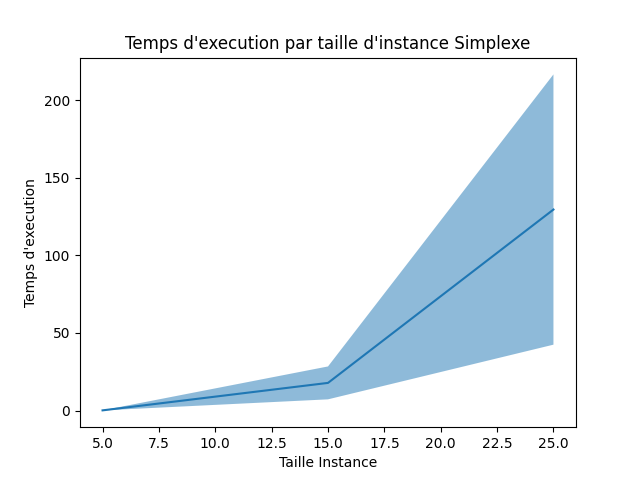

We can notice two things, first the calculation time increase rapidly and the calculation time can greatly change between execution of the same instance 

This can be explain by the fact that even though the average calvulation time of simplexe polynomial in worst cases the solution time of $2^{N^2}$.

This is why we choose Ant algoritsm for the resolution


## Initial constraint

### Accuracy Threshold

After execution the thresholds found are the followings 

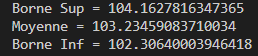

We take the upper threshold

### Parameter calculation
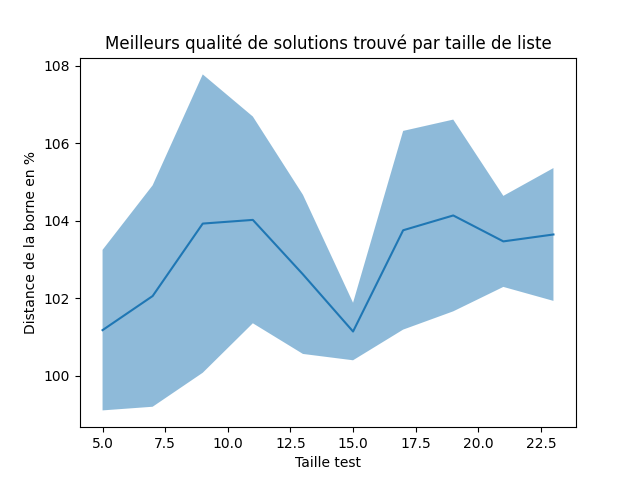
 
 
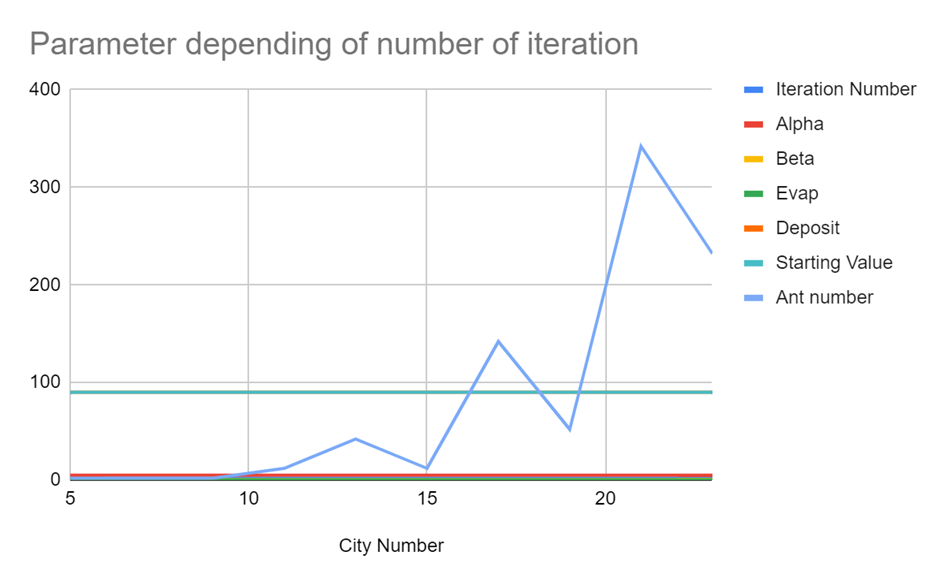
 
So all the parameter seems constant in average except THe ant colony number increasing roughly lineary
So knowing that and taking into, consideration the case of bigger instance the parameter chose is the Number of Ant = Number of city and the reste stay at the value found in the first lines

### CPU Test

We can see below that the calculation is steady (because the number of iteration don't depend of the result) and acceptable

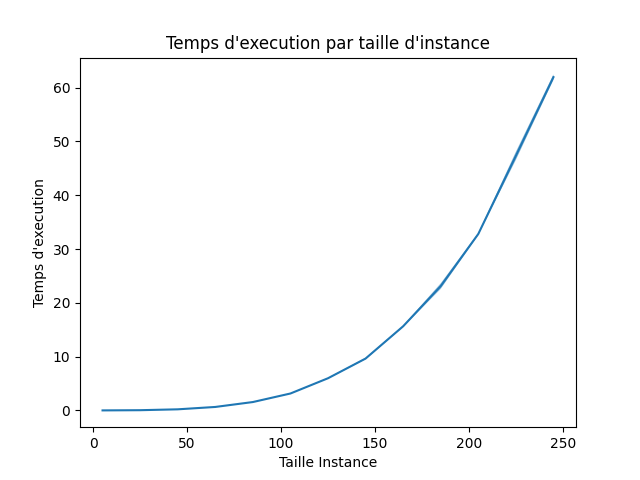

### Accuracy on bigger instance (237 cities)

We can see that our parameter aren't optimal as we diverge from the original mean with bigger instance (even though it's acceptable) so a rework will be needed

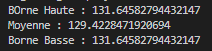

## 1st Constraint

### Accuracy Threshold

After execution the thresholds found are the followings 

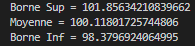


 We take the upper threshold

### Parameter calculation

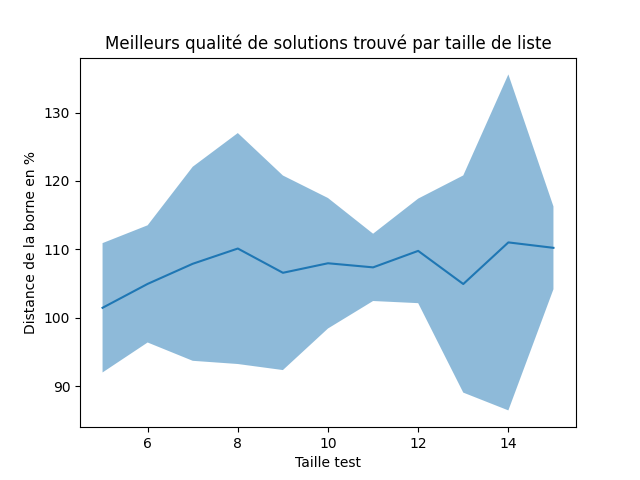

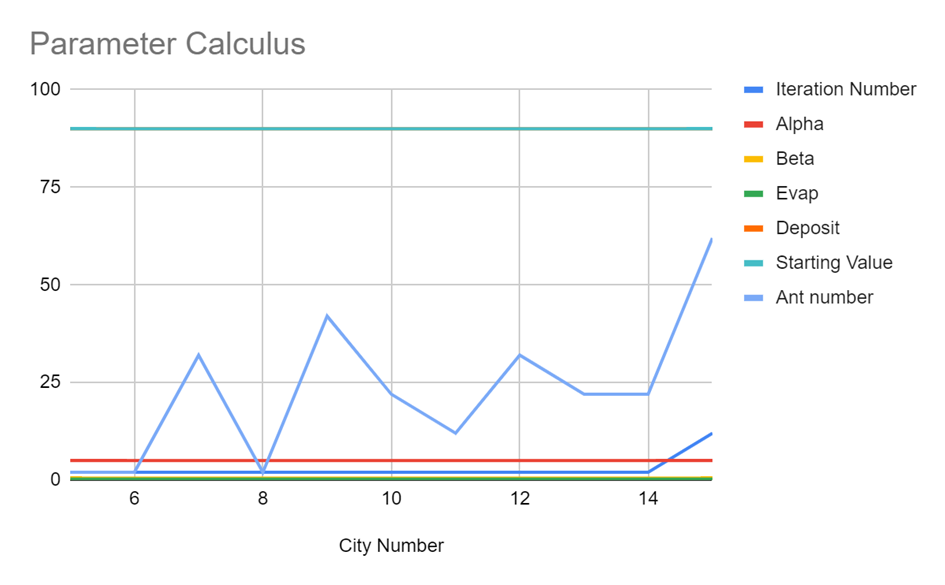

So all the parameter seems constant in average except THe ant colony number increasing roughly lineary
So knowing that and taking into, consideration the case of bigger instance the parameter chose is the Number of Ant = Number of city and the reste stay at the value found in the first lines

### CPU Test

We can see below that the calculation is steady (because the number of iteration don't depend of the result) and acceptable

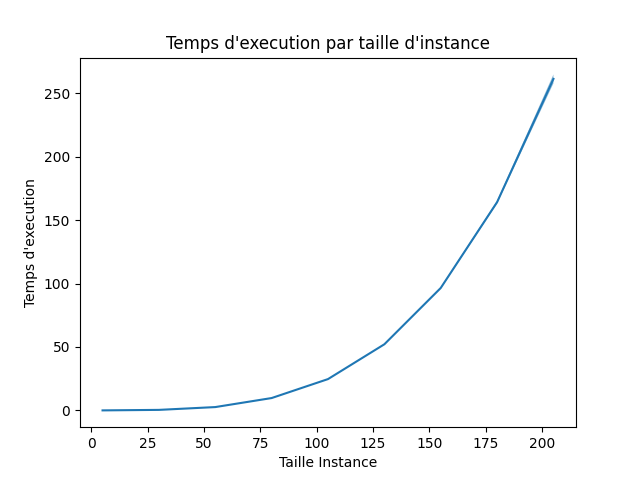

## 2nd Constraint

### Accuracy Threshold

After execution the thresholds found are the followings 

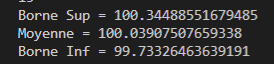

We take the upper threshold with 3% added due to the fact that the accuracy of simplexe is lost because of the nature of the constraint


### Parameter calculation

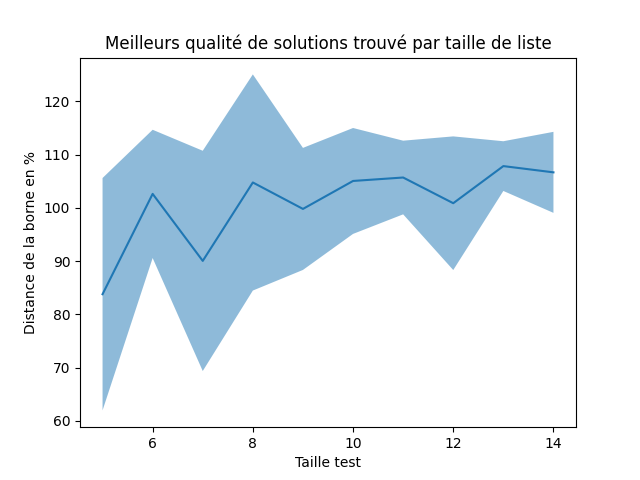


### CPU Test

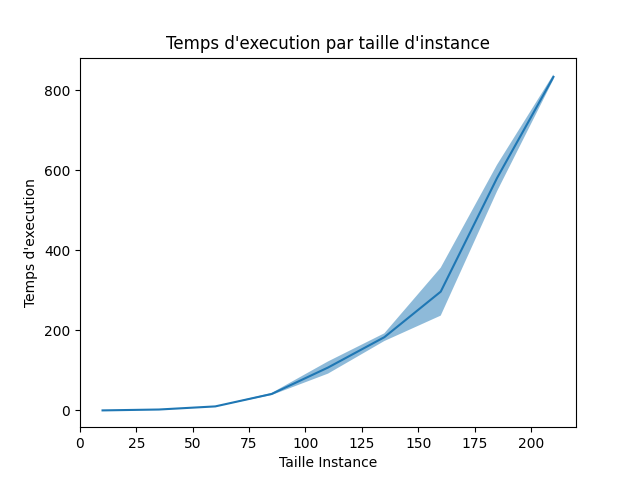

We can see below that the calculation is steady (because the number of iteration don't depend of the result) and acceptable

# Time Complexity Calculus

With the parameters found thank to the Experience plan we find the next 3 part :
- The transformation from Uncomplete to complete
- Solution with Ant algoritm
- Transformation from Complete to uncomplete

With K = any constant and V the number of City

## Uncomplete to Complete :
We use djiskra on every vertice of every time step possible (1st Constraint) to determine the shortest path from One vertice and sending the result to a translation array :
- Djikrska have a time complexity of V^2 
- The number of time step is COnstant to the situation : K 
- So we get K * V * V^2 = V^3

## Ant algorithm
We use ant algoritm to find the solution for our complete graph for that for every iteration every ant travel every City, Thanks to the Experience plan :
- Ant number = V * K_2 = V
- Iteration = K_1 
- So we get The time complexity : V * K_2 * K_1 * V = V^2

## Complete to uncomplete
Thank to the list created previously we just need to use it on every edges taken so the complexity is V

## Conclusion
So we get for the whole solution : V^3 + V^2 +V So we end up with a final time complexity of V^3



# Implementation of our code

###  <font color='#8B0000'> DisplayGraph.py </font> 

Create an incomplete graph and a complete graph from our new adjacency matrix. There are also the name of each vertex and a weight of each edges

In [2]:
import numpy as np
import numpy.linalg as alg
import networkx as nx
import matplotlib.pyplot as plt
from AlgoAV.Generation.GraphGen import GraphGen, WeigthSet
from AlgoAV.Modelisation.FullGraph import SetFullGraph

# Graphe    
def DisplayGraph(graph,FrontPath = [], FrontNode = None,EdgeWeigth = [],DisplayWeigth = False,DeleteOrNew = False):
    if(DeleteOrNew):
        plt.figure()
    else:
        plt.cls()
    G = nx.from_numpy_matrix(npGraph)
    
    pos = nx.spring_layout(G)
    node_colors = ['green' if i == FrontNode else 'red' for i in range(len(G.nodes))]
    print(G.edges)
    edge_colors = ['green' if (FrontPath[i],FrontPath[i+1]) in G.edges else 'red' for i in range(len(FrontPath)-1)]
    nx.draw_networkx(G, pos, with_labels=True, font_weight='bold',node_color=node_colors,edge_color=edge_colors,width=EdgeWeigth)
    if DisplayWeigth :
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.show()
    


###  <font color='#8B0000'> GraphGen.py </font> 



In [8]:
import numpy as np
import copy
import random
from typing import List,Tuple
from collections import deque
from functools import lru_cache

# Verify if a way is existing between two vertex

def ExistChemin(matriceAdj: List[List[bool]], u: int, v: int) -> bool :
    """
    
    Parameters
    ----------
    matriceAdj : List[List[int]]
        DESCRIPTION.
    u : int
        DESCRIPTION.
    v : int
        DESCRIPTION.
    Returns
    -------
    bool 
        DESCRIPTION.
    
    @authors : Charlie, Valentin, Dylan
    """
    n = len(matriceAdj)  # nombre de sommets dans le graphe
    file = deque()
    visites = [False] * n
    # ajouter le premier sommet à la file d'attente
    file.append(u)
    while file:
        # supprimer le sommet supérieur de la pile et marqué comme visité
        courant = file.pop()
        visites[courant] = True
 
        # visiter les sommets adjacents
        for i in range(n):
            # Il existe un chemin de u à i(v)
            if matriceAdj[courant,i] > 0:
            # Si le sommet i est le sommet voulu (i = v)
                if i == v:
                    return True
                # le sommet i n'est pas encore visité
                elif not(visites[i]):
                    file.append(i)
                    # ajouter i à la file marqué comme visité
                    visites[i] = True
    return False
 
# Verify if the matrix is connected or not..
    
def connecte(matriceAdj: List[List[bool]]) -> bool:
    """
    
    Parameters
    ----------
    matriceAdj : List[List[bool]]
        DESCRIPTION.
    Returns
    -------
    bool
        DESCRIPTION.
    @authors : Charlie, Valentin, Dylan
    """
    n = len(matriceAdj)  # nombre de sommets
    for i in range(1,n):
        if not(ExistChemin(matriceAdj, 0, i)):
                return False    
    return True

# Function used to generate the adjacence array from a connected non oriented graph of n cities

def GraphGen(nVille: int) -> Tuple[List[int]]:
    """
    Function used to generate the adjacence array from a connected non oriented graph of nVille cities
    Parameters
    ----------
    nVille : int
        Number of cities wanted for our graph.
    Returns
    -------
    List[List[int]]
        Adjacence array of said graph.
    """
    MatriceValid = False # Initialised the fact that the Array is yet to generate
    b_symm = [[False]*nVille for _ in range(nVille)] #Initialised sure to be invalid array
    while(not(MatriceValid)):
        Mat = np.random.choice((True, False), size=(nVille,nVille), p=[0.1, 0.9]) #Creation of a random array
        
        # we do the or operation with the trasposition to create symmetry
        b_symm = np.logical_or(Mat, Mat.T)
        
        for i in range(nVille):#We set the diagnonal to false to prohib loop back to itself
            b_symm[i,i] = False
        
        MatriceValid = connecte(b_symm) #We check if the graph is connected
    FinalArray = b_symm.astype(int).tolist()
    for i in range(nVille):
        FinalArray[i] = tuple(FinalArray[i])
    # We return the array in array of integers
    return tuple(FinalArray)


# Set a Weight for each edge.

def WeigthSet(MatAdj:Tuple[Tuple[int]],nVille:int,seed:int,maxWeigth:float) -> Tuple[Tuple[float]]:
    """
    
    Set a given adjacence array as Weigthed
    Parameters
    ----------
    MatAdj : List[List[int]]
        Corresponding adjacence array
    nVille : int
        Number of cities of the array
    seed : int
        Seed use to generate array
    maxWeigth : float
        MaxWeigth for graph
    Returns
    -------
    List[List[float]]
        Weigth Array.
    @ray-h
    """

    Matrice_Final = list(MatAdj)
    for i in range(nVille):
        Matrice_Final[i] = list(MatAdj[i])
    if seed is not None:
        random.seed(a=seed)
    else:
        random.seed()
    for i in range(nVille):
        for j in range(i):
            Matrice_Final[j][i] *= 1 + (random.random() * maxWeigth)
            Matrice_Final[i][j] = Matrice_Final[j][i]
    for i in range(nVille):
        Matrice_Final[i] = tuple(Matrice_Final[i])
    Matrice_Final = tuple(Matrice_Final)
    return Matrice_Final

###  <font color='#8B0000'> ColonyList.py </font> 

In [9]:
from typing import List,Tuple,Deque,Union,Annotated
from AlgoAV.Modelisation.FourmiList import CreateFourmi,UpdatePheromon,FourmiType,ChoosePath
import copy


ColonyType = List[Union[int,List[List[float]],List[FourmiType],int,int,int,float,Deque[int]]]
"""
List Representing the colony having for value :
0 : The size of the graph : Integer ;
1 : Array reprensenting the pheromonMap : List of List of float ;
2 : the list of ant : List of FourmiType ;
3 : The starting vertex of every ants : Integer ;
4 : The size of the colony : Integer ;
5 : The time to live of every ants : Integer
6 : Best Path Length
7 : Best Path
"""

# Create a colony element representeds as a ColonyType

def CreationColony(Mat: Tuple[Tuple[float]],CitySize:int,StartingVertice:int,ColonySize:int,StartValue:float) -> ColonyType:
    """
    Create a colny element represented as a ColonyType
    Parameters
    ----------
    Mat : Tuple[Tuple[float]]
        Array representing the travel time between two vertice.
    CitySize : int
        The number of vertice to visit.
    StartingVertice : int
        The vertice from which every ant start.
    ColonySize : int
        The number of ant in the colony.
    StartValue : float
        The starting pheromon value.
    Returns
    -------
    ColonyType
        The colony with the given parameters.
    """
    PheromonMap = [[StartValue if (Mat[i][j] > 0) else 0 for i in range(CitySize)] for j in range(CitySize)] # Creating the pheromon Map
    ListAnt = [CreateFourmi(StartingVertice) for _ in range(ColonySize)] # Generating every ant of the first iteration
    return [CitySize,PheromonMap,ListAnt,StartingVertice,ColonySize,CitySize-1,float('inf'),None]

# Prepare the colony for his next step/iteration

def SetNextStep(Colony: ColonyType,Evap: float,Depo: float):
    """
    
    Prepare the colony to start the next iteration
    
    Parameters
    ----------
    Colony : ColonyType
        DESCRIPTION.
    Evap : float
        DESCRIPTION.
    Depo : float
        DESCRIPTION.
    Returns
    -------
    None.
    """
    for i in range(Colony[0]): #Evaporate the aleready existing pheromon
        for j in range(i):
            Colony[1][i][j] *= (1-Evap)
            Colony[1][j][i] *= (1-Evap)
    for ant in Colony[2]:# Update pheromon repartion following
            UpdatePheromon(ant,Colony[1],Depo)
    Colony[2] = [CreateFourmi(Colony[3]) for _ in range(Colony[4])] # Create the next iteration of ants

# Move the colony to the next step/iteration

def MoveAnts(Colony: ColonyType,WMapRef:Tuple[Tuple[float]],Alpha:float,Beta:float):
    """
    
    Parameters
    ----------
    Colony : ColonyType
        DESCRIPTION.
    WMap : Tuple[Tuple[float]]
        DESCRIPTION.
    Alpha : float
        DESCRIPTION.
    Beta : float
        DESCRIPTION.
    Returns
    -------
    None.
    """

    for antIndex in range(Colony[4]-1,-1,-1):# We iterate through every ants
        ant: FourmiType = Colony[2][antIndex]
        WMapCopy = [[ WMapRef[i][j] if j != Colony[3] else 0 for j in range(Colony[0])] for i in range(Colony[0])]
        for i in range(Colony[5]): # We iterate until the arrive to their iteration limit (TTL)
            NewVertice = ChoosePath(tuple(Colony[1][ant[0]]),Colony[0],tuple(WMapCopy[ant[0]]),Alpha,Beta)

            ant[2] += WMapRef[ant[0]][NewVertice] # We add the path weigth to the total path length
            ant[1].append(NewVertice) # We add the Vertice to the path
            ant[0] = NewVertice

            for y in range(Colony[0]):
                WMapCopy[y][NewVertice] = 0
                
        ant[2] += WMapRef[ant[0]][Colony[3]] # We add the path weigth to the total path length
        ant[1].append(Colony[3]) # We add the Vertice to the path
        ant[0] = Colony[3]

        if(ant[2] < Colony[6]): #We check if we got a better path
            Colony[6] = ant[2]
            Colony[7] = copy.deepcopy(ant[1])

###  <font color='#8B0000'> FourmiList.py </font> 

In [10]:

from typing import List,Tuple,Deque,Union
from collections import deque
import random
from functools import lru_cache

FourmiType = List[Union[int,Deque[int],float]]
"""
List representing an ant made of the following values:
0 : CurrentPosition of the ant in the graph : integer,
1 : PathTaken By the ant : FILO of integer,
2 : TotalLength of the chosen path
"""

# Create an ant object with her parameters

def CreateFourmi(StartVertice:int) -> FourmiType:
    """
    
    Create a ant object with the given parameter 
    Parameters
    ----------
    StartVertice : int
        The vertice from which the ant must start.
    Returns
    -------
    FourmiType
        The ant with the given parameters.
    """
    return [StartVertice,deque((StartVertice,)),0]
    

# Choose the next vertex to go depending the given context parameters

def ChoosePath(PheromonMapRow:Tuple[float],CitySize:int,WMapRow:Tuple[float],Alpha:float,Beta:float) -> int:
    """
    
    Choose the next vertice to go folling the given context parameters
    Parameters
    ----------
    PheromonMapRow : Tuple[float]
        The row of the current position in the pheromonMap array.
    CitySize : int
        Number of city involved.
    WMapRow : Tuple[float]
        The row of the current position in the Weigthed array.
    Alpha : float
        The paramater alpha used by the ants.
    Beta : float
        The parameter beta used by the ants.
    Returns
    -------
    int
        The chosen next vertice.
    """

    Choices = PathChoiceCached(WMapRow,CitySize,PheromonMapRow,Alpha,Beta)
    
    Choice = random.choices(range(CitySize),weights=Choices,k=1)[0]

    return Choice

# Update the pheromone map depending of the given ant

def UpdatePheromon(Fourmi: FourmiType,PheromonMap: List[List[float]],Depo: float):
    """
    Update the pheromon map depending of the given ant    
    Parameters
    ----------
    Fourmi : FourmiType
        Ant that update the map.
    PheromonMap : List[List[float]]
        The pheromon map.
    Depo : float
        The number of pheromon deposit by the ant.
    Returns
    -------
    None.
    """
    Start = Fourmi[1].popleft()
    Next = Fourmi[1].popleft()
    while(len(Fourmi[1])>0):
        PheromonMap[Start][Next] += Depo/Fourmi[2]
        Start = Next
        Next = Fourmi[1].popleft()
    PheromonMap[Start][Next] += Depo/Fourmi[2]
    


# Give the probability to choose a Vertice instead another
@lru_cache(maxsize=256)
def PathChoiceCached(WMapRow: Tuple[float],MapSize: int,PheromonMapRow: Tuple[float],Alpha: float,Beta: float) -> List[float]:
    """
    
    Give the probability to choose a Vertice over another
    Parameters
    ----------
    WMapRow : Tuple[float]
        The Weigth List of the graph starting from the current position.
    MapSize : int
        The number of concerned vertice.
    PheromonMapRow : Tuple[float]
        The Pheromon List of the graph starting from the current position.
    Alpha : float
        The paramater alpha used by the ants.
    Beta : float
        The parameter beta used by the ants.
    Returns
    -------
    List[float]
        The probability for to choose next vertice.
    """
    Choices = [0]*MapSize
    for i in range(MapSize):
        if WMapRow[i] > 0:
            Choices[i] = ((1/WMapRow[i])**Alpha)*(PheromonMapRow[i]**Beta)
        else:
            Choices[i] = 0 
    
    SumChoices = sum(Choices)
    for i in range(MapSize):
        Choices[i] /= SumChoices
    return Choices

###  <font color='#8B0000'> FullGraph.py </font> 

In [11]:
from typing import List,Tuple,Deque
from collections import deque
import random
import copy
from functools import lru_cache
import numpy as np
from AlgoAV.Generation.GraphGen import WeigthSet, GraphGen

# Do the Diklstra’s algorithm to find

def DjiskaSSSP(WGraph:Tuple[Tuple[float]],nVille:int, u:int,ListDeli:List[int]) -> Tuple[float,List[Deque[int]]]:
    """
    Do the Dijkstra's algorithm to find the shortest route between from the vertice u to all other vertices  
    Parameters
    ----------
    WGraph : List[List[float]]
        The weigth array use to determine the best path
    nVille : int
        The number of cities for our graph
    u : int
        The start vertice for the path
    Returns
    -------
    Tuple[float,Deque[int]]
        A tuple containing the total size of the shortest path at index 0 and A queu representing the corresponding path (including the start and end vertice)
    """
    Visited = deque() #Priority queu of the already visited vertice
    DistStart = [float('inf')]*(u) + [0.0] + [float('inf')]*(nVille-(u+1))#Array representing each vertice distance with the vertice u
    copyWGraph = list(copy.deepcopy(WGraph)) #A copy of the weigthed array to process the algoritm

    for i in range(nVille):
        copyWGraph[i] = list(copyWGraph[i])


    for i in range(len(copyWGraph)):#initialise every non-existing edge has infinite 
        for j in range(i+1):
            if(copyWGraph[i][j] == 0):
                copyWGraph[i][j] = float('inf')
                copyWGraph[j][i] = float('inf')
    
    while(any([ (i not in Visited) for i in ListDeli]) ):#Cycle through the shortest path from u and the already visited vertice until we visit the vertice v
        MinWeigth = float('inf')
        CurVertice = 0
        for i,value in enumerate(DistStart): #We search the accessible vertice for the closer one
            if(value < MinWeigth) and (i not in Visited):
                MinWeigth = value
                CurVertice = i
        
        Visited.append(CurVertice) # The vertice is then  considered visited
 
        for i in range(nVille):# We update every neighbour edge and vertice from visited vertice
            if i not in Visited:
                curValue = DistStart[CurVertice] + copyWGraph[CurVertice][i]
                if(curValue < DistStart[i]):
                    DistStart[i] = curValue
                copyWGraph[CurVertice][i] = curValue
                copyWGraph[i][CurVertice]

    AllPath = []
    for i in ListDeli:
        Path = deque((i,))
        cur = i
        if(i == u):
            Path.append(i)
        while(u not in Path):# We cycle through the shortest edge from ou vertice v to backtrack to our vertice u
            MinWeigth = float('inf')
            CurVertice = 0
            for i,value in enumerate(copyWGraph[cur]):
                if(value < MinWeigth) and (i not in Path):
                    MinWeigth = value
                    CurVertice = i
            cur = CurVertice
            Path.appendleft(cur)
        AllPath.append(Path)
    return (DistStart,AllPath)

# Create a complet graph based on the incompleted graph 

def SetFullGraph(ListDeli:Tuple[int],nVille:int,WGraph : Tuple[Tuple[float]]) -> Tuple[List[List[Deque[int]]],Tuple[Tuple[float]]] : 
    """
    Create a complete Graph corresponding to the given incomplete graph 
    Parameters
    ----------
    ListDeli : [int]
        List of the city to delivers need to be made unique indexes to be able to do the inverse translation
    nVille : int
        Number of cities to process.
    WGraph : List[List[float]]
        Weigthed array of the situation.
    Returns
    -------
    EquivArray : List[List[Deque[int]]]
        The transformation array from the direct path from the full graph to the true path for the ADEME probleme.
    WIntGraph : List[List[float]]
        Weigthed graph of the full graph.
    """
    EquivArray = [[deque() for _ in range(nVille)] for _ in range(nVille)]
    WIntGraph =  [[0 for _ in range(nVille)] for _ in range(nVille)]
    NewCityLength = len(ListDeli)

    for i in ListDeli:
        Size, Equiv= DjiskaSSSP(WGraph, nVille, i,ListDeli)
        WIntGraph[i] = Size
        EquivArray[i] = Equiv
    for i in  range(nVille-1,-1,-1):
        if i not in ListDeli:
            WIntGraph.pop(i)
            
    for i in range(NewCityLength):
        for j in range(nVille-1,-1,-1):
            if j not in ListDeli:
                WIntGraph[i].pop(j)
        WIntGraph[i] = tuple(WIntGraph[i])

    return  EquivArray , 

###  <font color='#8B0000'> ExperiencePlan.py </font> 

In [3]:
from pulp import *
import numpy as np
import math

def Borne(CitySize,WMat):
    StateMat = {}
    OrderList = {}
    for i in range(CitySize):
        for j in range(CitySize): # create a binary variable
            StateMat[i, j] = LpVariable('x{},{}'.format(i, j),lowBound=0,upBound=1, cat=const.LpBinary)

    for i in range(CitySize): # create a binary variable
        OrderList[i] = LpVariable('u{}'.format(i),lowBound=1,upBound=CitySize, cat=const.LpInteger)

    
    # probleme
    prob = LpProblem("Shortest_Delivery", LpMinimize)

    # fonction objective
    cost = lpSum([[ WMat[n][m]*StateMat[n, m] for m in range(CitySize)] for n in range(CitySize)])
    prob += cost

    # contrainte
    for n in range(CitySize) :
        prob += lpSum([ StateMat[n,m] for m in range(CitySize)]) == 1,"All entered constraint "+str(n)
        prob += lpSum([ StateMat[m,n] for m in range(CitySize)]) == 1,"All exited constraint "+str(n)

    for i in range(CitySize) :
        for j in range(CitySize):
            if i != j and (i != 0 and j != 0):
                prob += OrderList[i] - OrderList[j] <= CitySize * (1 - StateMat[i, j]) - 1

    

    cont2 = lpSum([ StateMat[m,m] for m in range(CitySize)]) == 0,"No loop constraint"
    prob += cont2

    prob.solve(PULP_CBC_CMD(msg=0,timeLimit=math.ceil(CitySize*60*1/4)))
    return prob.objective.value() if (LpStatus[prob.status] == "Optimal") else None

###  <font color='#8B0000'> FourmiOpti.py </font> 

In [ ]:
from AlgoAV.Modelisation.ColonyList import CreationColony,ColonyType,MoveAnts,SetNextStep
from typing import Tuple,Deque
import random

# Find the best next iteration for an object

def FourmiOpti(WMap:Tuple[Tuple[float]],CitySize:int,Evap:float,Alpha:float,Beta:float,IterationCount:int,Deposit:float,StartingVertice:int,ColonySize:int,StartValue:float) -> Tuple[float,Deque[int]] :
    """
    
    Parameters
    ----------
    WMap : Tuple[Tuple[float]]
        The weigth array of to process.
    CitySize : int
        The number of vertice to process
    Evap : float
        The pheromone evaporation
    Alpha : float
        Alpha parameter for the process 
    Beta : float
        Beta parameter for the the process
    IterationCount : int
        Iteration Number for the process
    Deposit : float
        The quantity of pheromone spread 
    StartingVertice : int
        The starting Vertice to solve our problem
    ColonySize : int
        The Number of ant to process
    StartValue : float
        The starting value for the pheromone quantity
    Returns
    -------
    Tuple[float,Deque[int]] 
        The best path found and its length
    """
    random.seed()
    ColonyO: ColonyType = CreationColony(WMap, CitySize, StartingVertice, ColonySize, StartValue)
    for i in range(IterationCount):
        MoveAnts(ColonyO,WMap,Alpha,Beta)
        if(i < IterationCount-1):
            SetNextStep(ColonyO,Evap,Deposit)
    return  ColonyO[6],ColonyO[7]

###  <font color='#8B0000'> AcceptanceCalculationOpti.py </font> 

In [ ]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSet
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Processing.ExperiencePlan import Borne
from AlgoAV.Processing.FourmiOpti import FourmiOpti
import mysql.connector
import progressbar
import numpy as np
import random
import math

if __name__ == "__main__":
    

    widgets = ['\n['
               , progressbar.Timer(),
            '] ',
            progressbar.Bar('*'),' ',
            progressbar.Percentage(),' | (',
            progressbar.ETA(), ')\n',
            ]
    NbTest = 30
    seed = None
    if seed is not None:
        random.seed(seed)
    else:
        random.seed()

    nb_steps_bar = NbTest
    SizeEnumerate = [10]
    nb_steps_bar *= len(SizeEnumerate)
    
    IterationRange = range(math.floor(SizeEnumerate[0]/4),(SizeEnumerate[0]*2),math.floor(SizeEnumerate[0]/4))
    nb_steps_bar *= len(IterationRange)


    ProportionRange = range(10,100,50)
    nb_steps_bar *= len(ProportionRange)
    # AlphaRange = range(30,40,5)
    # nb_steps_bar *= len(AlphaRange)
    
    # BetaRange = range(30,40,5)
    # nb_steps_bar *= len(BetaRange)
    
    EvapRange = range(40,65,5)
    nb_steps_bar *= len(EvapRange)
    
    DepRange = range(100,110,10)
    nb_steps_bar *= len(DepRange)

    StartRange = range(100,110,10)
    nb_steps_bar *= len(StartRange)

    ColonySIzeRange = range(math.floor(SizeEnumerate[0]/4),(SizeEnumerate[0]*2),math.floor(SizeEnumerate[0]/4))
    nb_steps_bar *= len(ColonySIzeRange)

    print(nb_steps_bar)
    
    Textbar = progressbar.ProgressBar(maxval=nb_steps_bar, 
                              widgets=widgets)
    Textbar.start()
    value = 0

    #Nombre Ville
    CorrespondingSize = []
    BestCompositionsList = []
    BestMeanValuesList = []
    BestMeanDerivativeValuesList = []
    for SizeTest in SizeEnumerate:
        
        Compositions = []
        MeanValues = []
        DerivativeValues = []
        maxWeigth = 1000
        
        ListTest = []
        ListBorne = []
        for _ in range(NbTest):

            startingVertice = random.choice(range(SizeTest))
            ListDeliveries = list(range(SizeTest))

            ListDeliverieTreated = tuple(np.unique(ListDeliveries).tolist())
            CityTotreat = len(ListDeliverieTreated)
            Graph = GraphGen(SizeTest)
            WGraph = WeigthSet(Graph,SizeTest,seed,maxWeigth)
            
            
            EquivArray, WFullGraph = SetFullGraph(ListDeliverieTreated,SizeTest,WGraph)
            
            ListTest.append((WFullGraph,startingVertice,CityTotreat))
            borne = Borne(CityTotreat,WFullGraph)
            ListBorne.append(borne)
        ListTest = tuple(ListTest)
        ListBorne = tuple(ListBorne)
        Sufficient = False

        for ItterationUsed in IterationRange:
        #NIteration

            for Prop in ProportionRange:
            #Alpha
                Beta = 5

                Alpha: float = Beta*(Prop/100)

                for Evap in EvapRange:
                #Evap
                    Evap /= 100

                    for Deposit in DepRange:    
                    #Deposit


                        for StartValue in StartRange:


                            for ColonySize in ColonySIzeRange :
                            #ColonySize

                                random.seed()
                                CurValues = []
                                Compo = (ItterationUsed,Alpha,Beta,Evap,Deposit,StartValue,ColonySize)
                                Textbar.update(value)
                                print(str(SizeTest)+" : "+str(Compo))
                                for test in range(NbTest):
                                        value += 1
                                        MinWeigth, BestPath = \
                                        FourmiOpti(ListTest[test][0],
                                                   ListTest[test][2],
                                                   Evap,
                                                   Alpha,
                                                   Beta,
                                                   ItterationUsed,
                                                   Deposit,
                                                   ListTest[test][1],
                                                   ColonySize,
                                                   StartValue
                                                   )
                                        if(BestPath is not None) :
                                            CurValues.append((MinWeigth/ListBorne[test])*100)
                                if len(CurValues) > 0:
                                    meanValue = np.mean(CurValues)
                                    print(meanValue)
                                    Compositions.append(Compo)
                                    MeanValues.append(np.mean(CurValues))
                                    DerivativeValues.append(np.nanstd(CurValues))
        if len(MeanValues) > 0:
            indexBest = MeanValues.index(min(MeanValues))
            CorrespondingSize.append(SizeTest)
            # BestCompositionsList.append(Compositions[indexBest])
            BestMeanValuesList.append(np.mean(MeanValues))
            BestMeanDerivativeValuesList.append(np.nanstd(MeanValues))
    Textbar.finish()
    # affichage de la courbe de moyenne
    print("Beginning Display")
    print(str(CorrespondingSize[0]))
    print("Borne Sup = " +str(BestMeanValuesList[0] + 1.96 * (BestMeanDerivativeValuesList[0]/math.sqrt(nb_steps_bar/NbTest))))
    print("Moyenne = " +str(BestMeanValuesList[0]))
    print("Borne Inf = " +str(BestMeanValuesList[0] - 1.96 * (BestMeanDerivativeValuesList[0]/math.sqrt(nb_steps_bar/NbTest))))

###  <font color='#8B0000'> PlanDexperience.py </font> 
 Main function used to find the best parameter for each size of an intance with a given threshold and send it to a database while display a graph to the user

In [ ]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSet
from AlgoAV.Processing.FourmiOpti import FourmiOpti
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Processing.ExperiencePlan import Borne
from ipywidgets import IntProgress
from IPython.display import display
import mysql.connector
import progressbar
import matplotlib.pyplot as plt
import numpy as np
import random
import math

if __name__ == "__main__":
    

    widgets = ['\n['
               , progressbar.Timer(),
            '] ',
            progressbar.Bar('*'),' ',
            progressbar.Percentage(),' | (',
            progressbar.ETA(), ')\n',
            ]
    NbTest = 1
    PourcentageCible = 104.9879230895329
    seed = 20
    minSize = 5
    maxSize = 30
    stepSize = 1
    if seed is not None:
        random.seed(seed)
    else:
        random.seed()

    nb_steps_bar = NbTest
    SizeEnumerate = range(minSize,maxSize,stepSize)
    nb_steps_bar *= len(SizeEnumerate)

    # Iteration range(Ceil(Size/2),Size*3,Ceil(Size/10))
    MaxCeiled = maxSize - ((maxSize-minSize)%stepSize)
    nb_steps_bar *= (35/2)*(MaxCeiled-minSize)/stepSize

    # ColonySize range(Ceil(Size/2),Size*3,Ceil(Size/10))
    nb_steps_bar *= (35/2)*(MaxCeiled-minSize)/stepSize

    
    ProportionRange = range(10,170,50)
    nb_steps_bar *= len(ProportionRange)
    
    EvapRange = range(25,55,5)
    nb_steps_bar *= len(EvapRange)
    
    DepRange = range(90,106,3)
    nb_steps_bar *= len(DepRange)

    StartRange = range(90,120,10)
    nb_steps_bar *= len(StartRange)
    
    Textbar = progressbar.ProgressBar(maxval=nb_steps_bar, 
                              widgets=widgets)
    Textbar.start()
    value = 0

    #Nombre Ville
    CorrespondingSize = []
    BestCompositionsList = []
    BestMeanValuesList = []
    BestMeanDerivativeValuesList = []
    for SizeTest in SizeEnumerate:
        IteRange = range(math.ceil(SizeTest/4),2*SizeTest,math.ceil(SizeTest/10))
        ColonySIzeRange = range(math.ceil(SizeTest/4),2*SizeTest,math.ceil(SizeTest/10))
        
        
        Compositions = []
        MeanValues = []
        DerivativeValues = []
        maxWeigth = 1000
        
        ListTest = []
        print("Generating graph of size : " + str(SizeTest))
        for _ in range(NbTest):
            borne = None
            while borne is None:
                print("New Generation test")
                startingVertice = random.choice(range(SizeTest))

                ListDeliverieTreated = tuple(range(SizeTest))

                CityTotreat = len(ListDeliverieTreated)
                Graph = GraphGen(SizeTest)
                WGraph = WeigthSet(Graph,SizeTest,seed,maxWeigth)
                
                
                EquivArray, WFullGraph = SetFullGraph(ListDeliverieTreated,SizeTest,WGraph)

                borne = Borne(len(ListDeliverieTreated),WFullGraph)
            
            ListTest.append((WFullGraph,startingVertice,CityTotreat,borne))


        print("Starting Calculation for size of : "+str(SizeTest))
        Sufficient = False

        for Prop in ProportionRange :
            Alpha = 5
            Beta = Alpha*(Prop/100)

            for Evap in EvapRange:
            #Evap
                Evap /= 100

                for Deposit in DepRange:    
                #Deposit

                    for StartValue in StartRange:
                    #StartValue
                        for ItterationUsed in IteRange:
                        #NIteration
                        
                            for ColonySize in ColonySIzeRange :
                            #ColonySize

                                random.seed()
                                CurValues = []
                                if not(Sufficient):
                                    Compo = (ItterationUsed,Alpha,Beta,Evap,Deposit,StartValue,ColonySize)
                                    Textbar.update(value)
                                    print(str(SizeTest)+": "+str(Compo))
                                for test in range(NbTest):
                                    if not(Sufficient):
                                        MinWeigth, BestPath = \
                                        FourmiOpti(ListTest[test][0],
                                                ListTest[test][2],
                                                Evap,
                                                Alpha,
                                                Beta,
                                                ItterationUsed,
                                                Deposit,
                                                ListTest[test][1],
                                                ColonySize,
                                                StartValue
                                                )
                                        value += 1
                                        if(BestPath is not None) :
                                            CurValues.append((MinWeigth/ListTest[test][3])*100)
                                    else:
                                        value += 1
                                if len(CurValues) > 0:
                                    meanValue = np.mean(CurValues)
                                    print(meanValue)
                                    Compositions.append(Compo)
                                    MeanValues.append(np.mean(CurValues))
                                    DerivativeValues.append(1.96 * (np.nanstd(CurValues)/math.sqrt(NbTest)))
                                    if meanValue < PourcentageCible:
                                        Sufficient = True
        if len(MeanValues) > 0:
            indexBest = MeanValues.index(min(MeanValues))
            CorrespondingSize.append(SizeTest)
            BestCompositionsList.append(Compositions[indexBest])
            BestMeanValuesList.append(MeanValues[indexBest])
            BestMeanDerivativeValuesList.append(DerivativeValues[indexBest])
    Textbar.finish()
    # affichage de la courbe de moyenne
    print("Beginning Display")
    plt.plot(CorrespondingSize, BestMeanValuesList)
    
    
    # affichage de la bande d'écart-type
    plt.fill_between(CorrespondingSize,
                    np.subtract(BestMeanValuesList, BestMeanDerivativeValuesList), # borne haute
                    np.add(BestMeanValuesList, BestMeanDerivativeValuesList),      # borne basse
                    alpha=.5)                          # transparence
    plt.xlabel("Taille test")
    plt.ylabel("Distance de la borne en %")
    plt.title("Meilleurs qualité de solutions trouvé par taille de liste")
    
    print("Beginning to send to DB")
    RowList = []
    for i in range(len(CorrespondingSize)):
        RowList.append((CorrespondingSize[i],BestCompositionsList[i][0],BestCompositionsList[i][1],BestCompositionsList[i][2],BestCompositionsList[i][3],BestCompositionsList[i][4],BestCompositionsList[i][5],BestCompositionsList[i][6]))
    connection = mysql.connector.connect(host='testrialpayapi.cokj0wfmdhfw.eu-west-3.rds.amazonaws.com',
                                         port=3315,
                                         database='AlgoAV',
                                         user='PortfolioUser')
    connection.start_transaction()
    c = connection.cursor()
    for i in RowList:
       c.execute("REPLACE INTO Param VALUES (%s,%s,%s,%s,%s,%s,%s,%s)",i)
    connection.commit()
    c.close()
    connection.close()
    plt.show()

###  <font color='#8B0000'> ResolutionCalculationOpti.py </font> 

In [ ]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSet
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Processing.ExperiencePlan import Borne
from AlgoAV.Processing.FourmiOpti import FourmiOpti
import matplotlib.pyplot as plt
from collections import deque
import mysql.connector
import progressbar
import numpy as np
import random
import math
import copy
from time import process_time
if __name__ == "__main__":
    
    Nb_Test = 2
    MinSize = 5
    MaxSize = 350
    StepSize = 20
    SizeRange = range(MinSize,MaxSize,StepSize)

    List_MeanResult = []
    List_DerivationResult = []

    widgets = ['\n['
            , progressbar.Timer(),
        '] ',
        progressbar.Bar('*'),' ',
        progressbar.Percentage(),' | (',
        progressbar.ETA(), ')\n',
        ]

    nb_steps_bar = len(SizeRange)*Nb_Test
    value = 0

    Textbar = progressbar.ProgressBar(maxval=nb_steps_bar, 
                    widgets=widgets)
    Textbar.start()
    for nb_Cities in SizeRange:
        List_CurResult = []
        maxWeigth = 1000
        Evap = 0.25
        Alpha = 5
        Beta = 0.5
        Deposit = 90
        StartValueDeposit = 90

        seed = None
        if seed is not None:
            random.seed(seed)
        else:
            random.seed()

        for test in range(Nb_Test):
            print("=================================\nGeneration Full Graph ("+str(test)+","+str(nb_Cities)+")")
            startingVertice = random.choice(range(nb_Cities))
            ListDeliveries = list(range(nb_Cities))

            ListDeliverieTreated = tuple(np.unique(ListDeliveries).tolist())
            CityTotreat = len(ListDeliverieTreated)
            Graph = GraphGen(nb_Cities)
            WGraph = WeigthSet(Graph,nb_Cities,seed,maxWeigth)
            
            
            start = process_time()
            EquivArray, WFullGraph = SetFullGraph(ListDeliverieTreated,nb_Cities,WGraph)

            IterationUsed = math.ceil(CityTotreat/4)
            ColonySize = math.ceil(CityTotreat/4)

            print("\Generation time : "+str(process_time()-start)+" s")
            random.seed()
            


            print("Starting Calculation")
            MinWeigth, BestPath = \
            FourmiOpti(WFullGraph,
                        nb_Cities,
                        Evap,
                        Alpha,
                        Beta,
                        IterationUsed,
                        Deposit,
                        startingVertice,
                        ColonySize,
                        StartValueDeposit
                        )
            print("The next to optimal path length is : ", MinWeigth)
            print("The optimal path is : ")

            OptimalPath = deque()
            StartValue = BestPath.popleft()
            EndValue = BestPath.popleft()
            while(len(BestPath)>0):
                Equiv = copy.deepcopy(EquivArray[ListDeliverieTreated[StartValue]][ListDeliverieTreated[EndValue]])
                while(len(Equiv)>1):
                    OptimalPath.append(Equiv.popleft())
                StartValue = EndValue
                EndValue = BestPath.popleft()
            Equiv = copy.deepcopy(EquivArray[ListDeliverieTreated[StartValue]][ListDeliverieTreated[EndValue]])
            while(len(Equiv)>0):
                OptimalPath.append(Equiv.popleft())
            while(len(OptimalPath)>0):
                print(OptimalPath.popleft(),end="->")

            print("\nExecution time : "+str(process_time()-start)+" s")
            List_CurResult.append(process_time()-start)
            value += 1
            Textbar.update(value)
        List_MeanResult.append(np.mean(List_CurResult))
        List_DerivationResult.append(1.96 * (np.nanstd(List_CurResult)/math.sqrt(Nb_Test)))
    Textbar.finish()
    print("Beginning Display")
    plt.plot(SizeRange, List_MeanResult)
    
    
    # affichage de la bande d'écart-type
    plt.fill_between(SizeRange,
                    np.subtract(List_MeanResult, List_DerivationResult), # borne haute
                    np.add(List_MeanResult, List_DerivationResult),      # borne basse
                    alpha=.5)                          # transparence
    plt.xlabel("Taille Instance")
    plt.ylabel("Temps d'execution")
    plt.title("Temps d'execution par taille d'instance")
    plt.show()

# Bibliography

### Meta-heuristique

- https://igm.univ-mlv.fr/~dr/XPOSE2013/tleroux_genetic_algorithm/hello-world.html

- https://www.apprendre-en-ligne.net/info/algo/fourmis.html

- https://tel.archives-ouvertes.fr/tel-00126292/document

### Traveler salesmen complexity : 
- https://www.geeksforgeeks.org/travelling-salesman-problem-set-1/
- https://blog.routific.com/travelling-salesman-problem#:~:text=In%20fact%2C%20TSP%20belongs%20to,more%20destinations%20to%20the%20problem.
- https://en.wikipedia.org/wiki/Travelling_salesman_problem#:~:text=The%20travelling%20salesman%20problem%20(also,an%20NP%2Dhard%20problem%20in
- https://petar-v.com/talks/tsp_demo.pdf

### Decision version TSP :
- https://www.nomachetejuggling.com/2012/09/14/traveling-salesman-the-most-misunderstood-problem/
- https://petar-v.com/talks/tsp_demo.pdf
- https://en.wikipedia.org/wiki/Travelling_salesman_problem#:~:text=The%20travelling%20salesman%20problem%20(also,an%20NP%2Dhard%20problem%20in

### Operational Research
- https://qiskit.org/documentation/stable/0.24/locale/fr_FR/tutorials/optimization/6_examples_max_cut_and_tsp.html

### TSP-PC

- https://www.researchgate.net/publication/268493057_The_Travelling_Salesman_Problem_with_Precedence_Constraints

- https://www.sciencedirect.com/science/article/pii/S2405896316310485